In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
gtex=pd.read_csv('../data/gtex_tpm_median.csv.gz',index_col=0)
gtex.shape

(54, 49422)

In [3]:
ips=pd.read_csv('../data/ips_tpm.gz',index_col=0)
ips.shape

(330, 35049)

In [4]:
df=pd.concat([gtex.mean(),ips.median()],axis=1)
df.columns=['non','ips']
df=df.dropna()

In [5]:
df=df[~df.index.str.startswith('MT')]
df=df[~df.index.str.startswith('RP')]

In [6]:
tf=pd.read_csv('http://humantfs.ccbr.utoronto.ca/download/v_1.01/TF_names_v_1.01.txt',header=None)[0].values
len(tf)

1639

In [9]:
df['ips/non']=(df.ips+1)/(df.non+1)
topi=df.sort_values('ips/non').tail(20)
topi

,non,ips,ips/non
CALB1,9.026312,889.095,88.775915
CBS,1.292370,209.205,91.697671
MIF,4.718456,567.235,99.368598
IGF2BP3,0.894961,188.915,100.221050
TRIM71,0.307045,138.770,106.935889
ZFP42,0.098451,122.595,112.517561
ZSCAN10,0.055702,122.265,116.761204
DNMT3B,1.874507,410.520,143.161947
U2AF1,0.540746,237.305,154.668593
L1TD1,0.492034,299.005,201.071165


In [12]:
top=ips[topi.index]
top.head()

,CALB1,CBS,MIF,IGF2BP3,TRIM71,ZFP42,ZSCAN10,DNMT3B,U2AF1,L1TD1,ABHD12B,SNURF,TDGF1,GABRP,CLDN6,DPPA4,LIN28A,HHLA1,SCGB3A2,AC004057.1
HPSI1213i-xuja_2,470.18,211.85,607.14,142.57,135.25,1.45,124.57,203.63,261.46,258.32,234.02,682.79,309.55,495.85,285.57,857.13,604.83,267.20,587.83,958.80
HPSI0614i-voce_2,1862.68,160.52,727.16,202.09,171.81,120.50,124.65,319.56,194.96,310.15,1867.00,708.88,901.66,3851.85,532.80,817.75,719.11,2554.06,10627.10,1759.43
HPSI0814i-doao_2,654.44,237.23,915.74,221.00,131.92,19.19,149.76,256.44,200.35,201.46,471.87,813.43,536.09,970.25,427.96,657.72,582.86,530.67,1770.83,1548.25
HPSI0314i-sojd_3,856.99,328.92,838.66,143.49,97.37,96.13,162.28,417.94,204.21,314.96,738.63,896.73,456.20,1267.51,691.32,739.14,603.57,836.69,2695.38,1301.99
HPSI0114i-lexy_2,950.71,281.21,823.05,132.77,98.49,136.03,178.80,564.11,255.76,493.50,624.69,1026.05,864.63,1269.10,596.99,598.56,623.28,740.97,2347.93,1444.58


In [39]:
top=top[top.median().sort_values(ascending=False).index]

In [53]:
test=ips.head(1)[top.median().sort_values(ascending=False).index].T

[None]

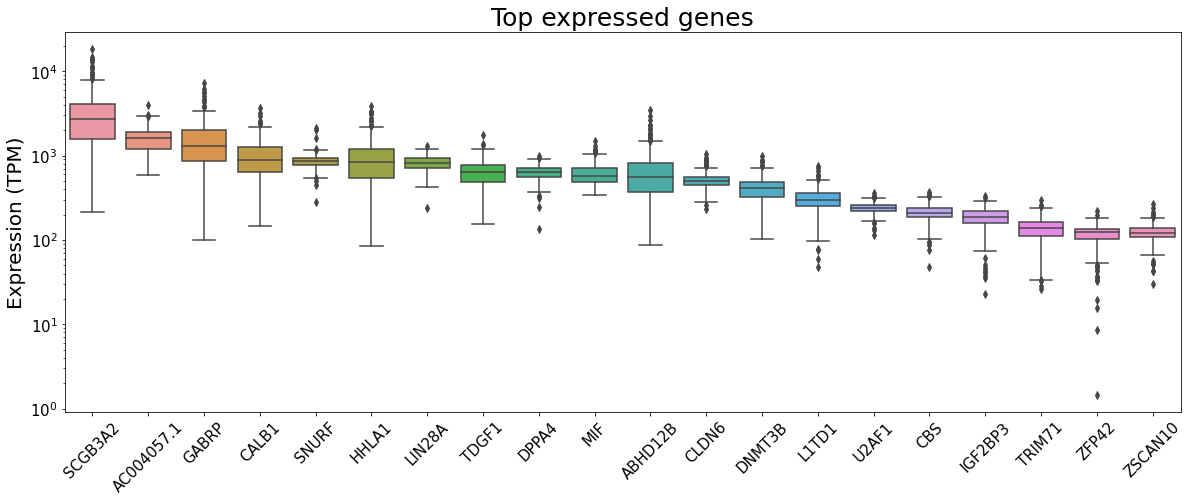

In [58]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
#b=sns.lineplot(data=test,linewidth=2,ax=ax)
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")

[None]

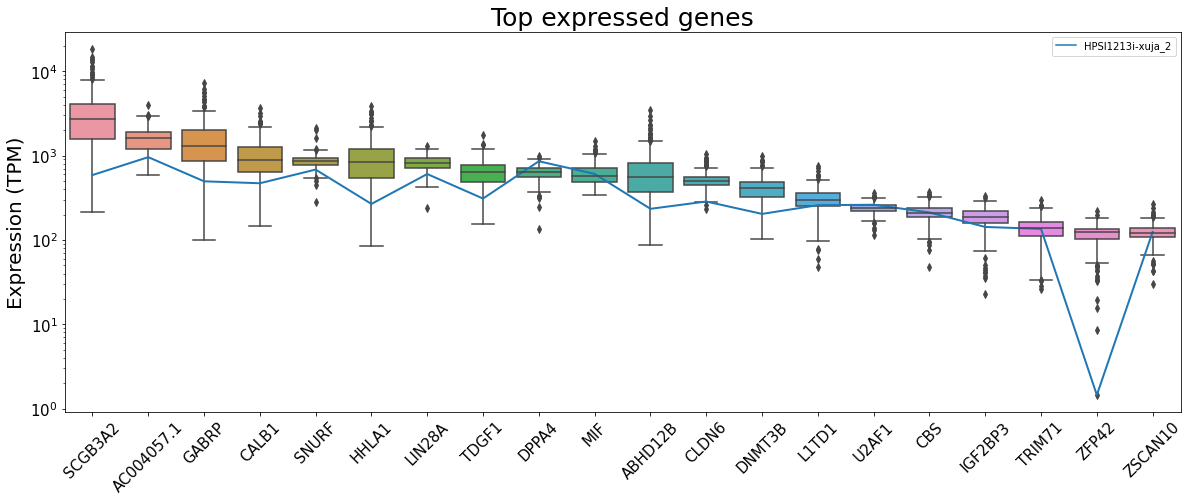

In [52]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
b=sns.lineplot(data=test,linewidth=2,ax=ax)
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")

In [56]:
test=gtex.head(10)[top.median().sort_values(ascending=False).index].T

[None]

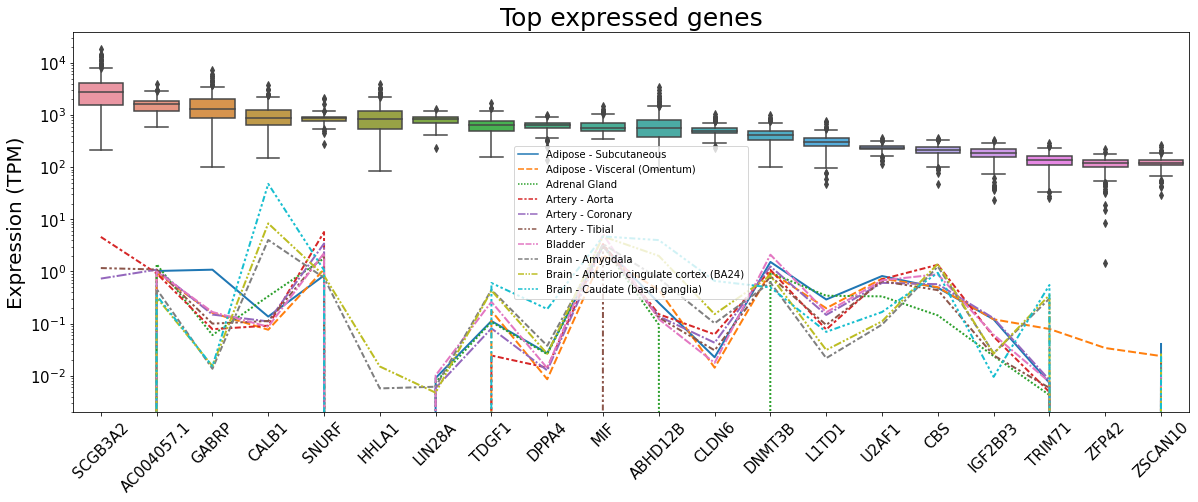

In [57]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
b=sns.lineplot(data=test,linewidth=2,ax=ax)
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")